# A fastest growing startups is in the logistics and delivery domain. They work with several partners and make on-demand delivery to tehir customers. During the COVID-19 pandemic, they are facing several different challenges and everyday they are trying to address these challenges.

They want to predict what makes their customers happy or unhappy using six features, so they can take necessary actions.

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
X1 = my order was delivered on time
X2 = contents of my order was as I expected
X3 = I ordered everything I wanted to order
X4 = I paid a good price for my order
X5 = I am satisfied with my courier
X6 = the app makes ordering easy for me

In [30]:
# IMPORT LIBRARYS
import os
import csv
import time 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV,cross_val_score,train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.feature_selection import SelectKBest,chi2,RFE
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.svm import SVR

In [31]:
# OPEN THE .CSV FORMAT WITH PANDAS
data = pd.read_csv (r'ACME-HappinessSurvey2020.csv')
print (data)
#print(data.shape)
#print(data)

     Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3   3   3   5
4    0   5   4   3   3   3   5
..  ..  ..  ..  ..  ..  ..  ..
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5

[126 rows x 7 columns]


In [32]:
#Checking the data
df = pd.DataFrame(data)
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00
mean,0.55,4.33,2.53,3.31,3.75,3.65,4.25
std,0.50,0.80,1.11,1.02,0.88,1.15,0.81
min,0.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,0.00,4.00,2.00,3.00,3.00,3.00,4.00
50%,1.00,5.00,3.00,3.00,4.00,4.00,4.00
75%,1.00,5.00,3.00,4.00,4.00,4.00,5.00
max,1.00,5.00,5.00,5.00,5.00,5.00,5.00


In [62]:
#VERIFY IF THE DATABASE IS BALANCE OR UNBALANCE
labels1=df[df['Y'].gt(0)]
labels0=df.shape[0]-labels1.loc[:,'Y'].shape[0]
print('# OF UNHAPPY CUST 0:',labels0,'# OF HAPPY CUST 1:',labels1.loc[:,'Y'].shape[0])


# OF UNHAPPY CUST 0: 57 # OF HAPPY CUST 1: 69


In [34]:
#DIVIDE TO FEATURES AND LABES, THEN DIVIDE DATA ON TRAIN AND VALIDATION
x = df.loc[:,'X1':]
#x_new=normalize(x) # NORMALIZE DATA
x_new=x # raw data
y=df.loc[:,'Y']
#print(x,y)
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.30, random_state=42)
#print(X_train)


In [35]:
#  LAZY PREDICT TO CHECK THE BEST ALGORITHM FOR THE DATA
classi = LazyClassifier(predictions=True)
# fit and train the model 
start_time_1=time.time()
models_c,predictions_c=classi.fit(X_train, X_test, y_train, y_test)
end_time_1=time.time()

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.64it/s]


In [36]:
# SHOW BEST MODELS
models_c

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.68,0.69,0.69,0.68,0.01
XGBClassifier,0.63,0.64,0.64,0.63,0.91
RandomForestClassifier,0.63,0.64,0.64,0.63,0.10
ExtraTreeClassifier,0.63,0.64,0.64,0.63,0.01
BaggingClassifier,0.63,0.64,0.64,0.63,0.02
AdaBoostClassifier,0.63,0.63,0.63,0.63,0.08
LabelSpreading,0.61,0.61,0.61,0.60,0.01
LabelPropagation,0.61,0.61,0.61,0.60,0.01
ExtraTreesClassifier,0.61,0.61,0.61,0.60,0.08


# FEATURES SELECTION

In [63]:
# FEATURES SELECTION SVRFE
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=4, step=1)
selector = selector.fit(x_new, y)
selector.support_# relevants values
selector.ranking_# NUMBER ONE ARE THE BEST FEATURES

array([1, 3, 2, 1, 1, 1])

In [64]:
#FEATURES SELECTION WITH DESICION TREE
feature_names = [f"feature {i}" for i in range(x_new.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [39]:
#Feature importance based on mean decrease in impurity
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.014 seconds


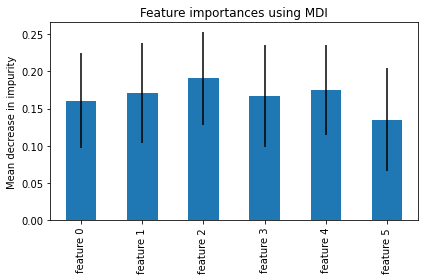

In [40]:
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [65]:
# SELECT BEST FEATURES
rank=selector.ranking_
X_best_features=[]
for i in range(len(rank)):    
    if(rank[i]==1):        
        X_best_features.append(x_new.iloc[:,i])        
X_best_features = pd.concat(X_best_features,axis=1)
# DIVIDE IN TRAIN AND VALIDATION WITH EBST FEATURES
X_train, X_test, y_train, y_test = train_test_split(X_best_features, y, test_size=0.30, random_state=42)


# RESULTS

Training Score: [0.4        1.         0.54545455 0.8        0.4       ]
Validation Score: 0.631578947368421
Specificity 0.5833333333333334


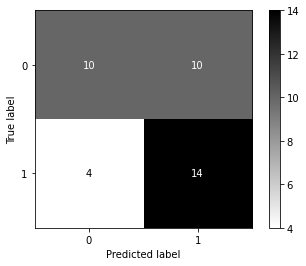

In [60]:

# FIRS MODEL QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
print('Training Score:',cross_val_score(clf, X_train, y_train, cv=5, scoring='recall'))
clf.fit(X_train, y_train)
print('Validation Score:',clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
matrix=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, X_test, y_test, cmap='gray_r')
print('Specificity',matrix[1,1]/(matrix[1,1]+matrix[0,1]))#Specificity (true negatives / all actual negatives) =TN / TN + FP


Training Score: [0.5        0.4        0.54545455 0.6        0.8       ]
Validation Score: 0.631578947368421
Specificity 0.5769230769230769


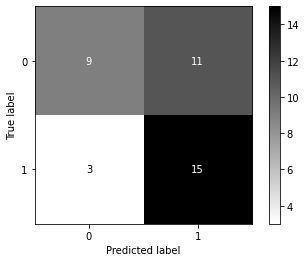

In [61]:
# SECOND MODEL XGBClassifieR
clf1 = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,max_depth=5, random_state=0)
print('Training Score:',cross_val_score(clf1, X_train, y_train, cv=5, scoring='recall'))

clf1.fit(X_train, y_train)
print('Validation Score:',clf1.score(X_test, y_test))
y_pred1 = clf1.predict(X_test)
matrix1=confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(clf1, X_test, y_test, cmap='gray_r')
print('Specificity',matrix1[1,1]/(matrix1[1,1]+matrix1[0,1]))#Specificity (true negatives / all actual negatives) =TN / TN + F

In [59]:
# SECOND MODEL XGBClassifieR tunning
param_grid={'n_estimators':[50,100,200],'learning_rate':[0.1,0.5,1.0],'max_depth': [3, 5, 10],'min_samples_split': [2, 5, 10]}
base_estimator = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,max_depth=5, random_state=0)
sh = RandomizedSearchCV(base_estimator, param_grid, cv=5).fit(X_train,y_train)
print(sh.best_estimator_)

GradientBoostingClassifier(n_estimators=50, random_state=0)


Training Score: [0.6        0.7        0.90909091 0.8        0.8       ]
Validation Score: 0.5263157894736842
Specificity 0.5


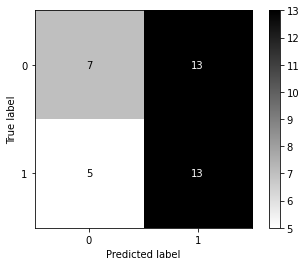

In [53]:
# THIRD MODEL RandomForestClassifier
clf2 = RandomForestClassifier(max_depth=5, random_state=0)
print('Training Score:',cross_val_score(clf2, X_train, y_train, cv=5, scoring='recall'))

clf2.fit(X_train, y_train)
print('Validation Score:',clf2.score(X_test, y_test))
y_pred2 = clf2.predict(X_test)
matrix2=confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(clf2, X_test, y_test, cmap='gray_r')
print('Specificity',matrix2[1,1]/(matrix2[1,1]+matrix2[0,1]))#Specificity (true negatives / all actual negatives) =TN / TN + F


In [54]:
# 4 MODEL RandomForestClassifier Tuning
param_grid = {'max_depth': [3, 5, 10],'min_samples_split': [2, 5, 10]}
base_estimator = RandomForestClassifier(random_state=0)
sh = RandomizedSearchCV(base_estimator, param_grid, cv=5).fit(X_train,y_train)
print(sh.best_estimator_)


RandomForestClassifier(max_depth=5, min_samples_split=5, random_state=0)


# EXAMPLE WITH THE DATABASE BALANCE WITH THE BEST MODELS

In [103]:
# DELETE HAPPY COUSTUMERA FOR BALANCE DATA WITH BEST FEATURES
x2 = X_best_features.loc[:,'X1':]
y2=y;
cont=0
index=[]
for i in range(len(y)):    
    if(y[i]==1):
        cont=cont+1
        index.append(i)
        if(cont==12):
            break      
new_x=x2.drop(index, axis=0)
new_y=y2.drop(index, axis=0)

In [104]:
# DIVIDE DATA
X_train, X_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.30, random_state=42)

Training Score: [0.88888889 0.55555556 0.875      0.75       0.375     ]
Validation Score: 0.6
Specificity 0.5263157894736842


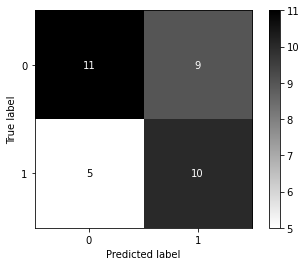

In [106]:
# QuadraticDiscriminantAnalysis MODEL WITH DATA BALANCE
clf = QuadraticDiscriminantAnalysis()
print('Training Score:',cross_val_score(clf, X_train, y_train, cv=5, scoring='recall'))
clf.fit(X_train, y_train)
print('Validation Score:',clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
matrix=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, X_test, y_test, cmap='gray_r')
print('Specificity',matrix[1,1]/(matrix[1,1]+matrix[0,1]))#Specificity (true negatives / all actual negatives) =TN / TN + FP


Training Score: [0.88888889 0.88888889 0.75       0.75       0.375     ]
Validation Score: 0.5428571428571428
Specificity 0.47368421052631576


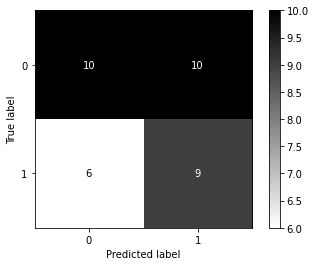

In [107]:
# SECOND MODEL XGBClassifieR
clf1 = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,max_depth=5, random_state=0)
print('Training Score:',cross_val_score(clf1, X_train, y_train, cv=5, scoring='recall'))

clf1.fit(X_train, y_train)
print('Validation Score:',clf1.score(X_test, y_test))
y_pred1 = clf1.predict(X_test)
matrix1=confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(clf1, X_test, y_test, cmap='gray_r')
print('Specificity',matrix1[1,1]/(matrix1[1,1]+matrix1[0,1]))#Specificity (true negatives / all actual negatives) =T

Training Score: [0.88888889 1.         0.875      0.625      0.5       ]
Validation Score: 0.5428571428571428
Specificity 0.47368421052631576


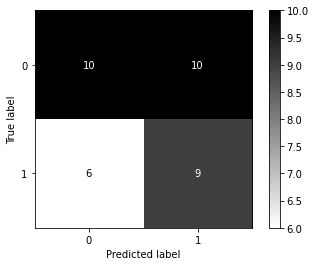

In [108]:
# THIRD MODEL RandomForestClassifier
clf2 = RandomForestClassifier(max_depth=5, random_state=0)
print('Training Score:',cross_val_score(clf2, X_train, y_train, cv=5, scoring='recall'))

clf2.fit(X_train, y_train)
print('Validation Score:',clf2.score(X_test, y_test))
y_pred2 = clf2.predict(X_test)
matrix2=confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(clf2, X_test, y_test, cmap='gray_r')
print('Specificity',matrix2[1,1]/(matrix2[1,1]+matrix2[0,1]))#Specificity (true negatives / all actual negatives) =TN / TN + F


# Conclusion
The analysis of the data was carried out, observing that the database of customers is unbalance, a test was carried out with different classifiers to observe which one best adapted to the database. Since the relevance in this problem is to detect customers who are unhappy with the service, it focuses on analyzing specificity, which is based on detecting if some customers are not happy.
Feature selection was carried out using support vector machines to reduce the features and a decision tree to detect the purest features, and the results show that both methods highlight the column (0,4,5,6) as the most important characteristics, this serves to detect which were the most relevant to solve the problem, and in the future only use the selected ones, since they are questions, therefore, if fewer questions can be asked to understand if the client is Satisfied or not is of great importance.
We proceed to select 3 models for the classification, of which the best highlighted is the QuadraticDiscriminantAnalysis and the XGBClassifieR, however the best is the QuadraticDiscriminantAnalysis which not require the pararameter to be tunning, and higher level of specificity, indicating that it is the model that best adapts to this database.

In adittion in ordert to reduce the missclasification, the database can be balance by reducing the number of customers to the same amount, so 57 customers are happy and unhappy, another alternative is to create dummy samples to increase the unhappy customer to 63.